In [1]:
# script to plot the error in ignition delay for table 7 vs. number of parameters replaced

In [1]:
import os
import pandas as pd
import numpy as np
import cantera as ct

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the experimental conditions
ignition_delay_data = '/work/westgroup/harris.se/autoscience/autoscience/butane/experimental_data/butane_ignition_delay.csv'
# ignition_delay_data = '/home/moon/autoscience/autoscience/butane/experimental_data/butane_ignition_delay.csv'
df_exp = pd.read_csv(ignition_delay_data)
table_exp = df_exp[df_exp['Table'] < 13]
# Define Initial conditions using experimental data
tau_exp = table_exp['time (ms)'].values.astype(float)  # ignition delay
tau_exp[tau_exp == 0] = np.nan
T7 = table_exp['T_C'].values  # Temperatures
P7 = table_exp['nominal pressure(atm)'].values * ct.one_atm  # pressures in atm
phi7 = table_exp['phi'].values  # equivalence ratios
# list of starting conditions
# Mixture compositions taken from table 2 of
# https://doi-org.ezproxy.neu.edu/10.1016/j.combustflame.2010.01.016
concentrations = []
for i in range(0, len(phi7)):
    if phi7[i] == 0.3:
        x_diluent = 0.7821
        conc_dict = {
            'O2(2)': 0.2083,
            'butane(1)': 0.00962
        }
    elif phi7[i] == 0.5:
        x_diluent = 0.7771
        conc_dict = {
            'O2(2)': 0.2070,
            'butane(1)': 0.01595
        }
    elif phi7[i] == 1.0:
        x_diluent = 0.7649
        conc_dict = {
            'O2(2)': 0.2038,
            'butane(1)': 0.03135
        }
    elif phi7[i] == 2.0:
        x_diluent = 0.7416
        conc_dict = {
            'O2(2)': 0.1976,
            'butane(1)': 0.06079
        }
    else:
        raise ValueError
    
    x_N2 = table_exp['%N2'].values[i] / 100.0 * x_diluent
    x_Ar = table_exp['%Ar'].values[i] / 100.0 * x_diluent
    x_CO2 = table_exp['%CO2'].values[i] / 100.0 * x_diluent
    conc_dict['N2'] = x_N2
    conc_dict['Ar'] = x_Ar
    conc_dict['CO2(7)'] = x_CO2

    concentrations.append(conc_dict)
assert len(T7) == len(concentrations)

In [3]:
def calc_avg_log_squared_error(mech_delays):
    return np.nanmean(np.float_power(np.log10(mech_delays) - np.log10(tau_exp / 1000.0), 2.0))

In [58]:
official_missing_indices = [1, 3, 12, 13, 15, 16, 17, 24, 25, 26, 27, 29, 38, 40, 42, 44, 48]
# indices = [0]

indices = list(set(np.arange(0, 51)) - set(official_missing_indices))
errors = np.zeros(51)
# missing_indices = []



errors[0] = calc_avg_log_squared_error(np.load(f'rmg_improved_delays_0000.npy'))

for i in range(1, 51):
    delay_data = np.load(f'rmg_improved_delays_{i:04}.npy')
    errors[i] = calc_avg_log_squared_error(delay_data)
#     if errors[i] == errors[i - 1]:
#     if np.isclose(errors[i], errors[i - 1], rtol=1e-6):
#     if i in m
#         missing_indices.append(i)
#     else:
#         indices.append(i)
    

Text(0, 0.5, 'Average $log_{10}(\\tau_{ign})$ Squared Error')

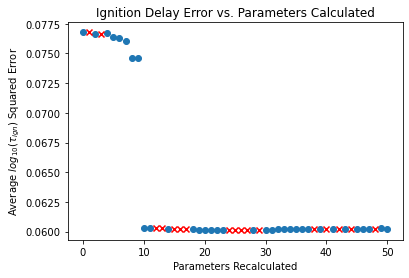

In [60]:
plt.scatter(indices, errors[indices], marker='o')

plt.scatter(official_missing_indices, errors[official_missing_indices], marker='x', color='red')
plt.title('Ignition Delay Error vs. Parameters Calculated')
plt.xlabel('Parameters Recalculated')
plt.ylabel(r'Average $log_{10}(\tau_{ign})$ Squared Error')

In [61]:
len(official_missing_indices)

17

In [56]:
missing_indices

[1, 3, 12, 13, 15, 16, 17, 24, 25, 26, 27, 30, 31, 38, 40, 42, 44, 48]

In [ ]:
# Load the experimental conditions
ignition_delay_data = '/work/westgroup/harris.se/autoscience/autoscience/butane/experimental_data/butane_ignition_delay.csv'
ignition_delay_data = '/home/moon/autoscience/autoscience/butane/experimental_data/butane_ignition_delay.csv'
df_exp = pd.read_csv(ignition_delay_data)

# slice just table 7, where phi=1.0
table7 = df_exp[df_exp['Table'] == 7]
# Define Initial conditions using experimental data
tau7 = table7['time (ms)'].values.astype(float)  # ignition delay
T7 = table7['T_C'].values  # Temperatures
P7 = table7['nominal pressure(atm)'].values * ct.one_atm  # pressures in atm


# list of starting conditions
# Mixture compositions taken from table 2 of
# https://doi-org.ezproxy.neu.edu/10.1016/j.combustflame.2010.01.016
concentrations = []
# for phi = 1
x_diluent = 0.7649
conc_dict = {
    'O2(2)': 0.2038,
    'butane(1)': 0.03135
}

for i in range(0, len(table7)):
    x_N2 = table7['%N2'].values[i] / 100.0 * x_diluent
    x_Ar = table7['%Ar'].values[i] / 100.0 * x_diluent
    x_CO2 = table7['%CO2'].values[i] / 100.0 * x_diluent
    conc_dict['N2'] = x_N2
    conc_dict['Ar'] = x_Ar
    conc_dict['CO2(7)'] = x_CO2
    concentrations.append(conc_dict)


In [ ]:
results_dir = '/home/moon/autoscience/autoscience/paper/error_vs_num_included/results'
results_dir = '/home/moon/autoscience/reaction_calculator/error_vs_num_included/results'


In [ ]:
tau7

In [ ]:
def calculate_error(delays):
    return np.sum(np.float_power(delays - (tau7 / 1000), 2.0))


In [ ]:
N = 51

missing_indices = []

# figure out if a new parameter was actually replaced in that version
error = np.zeros(N)
indices = np.arange(0, N)
for i in range(0, N):
    delay_file = os.path.join(results_dir, f'delays_{i}.npy')
    if not os.path.exists(delay_file):
        error[i] = error[i - 1]
        missing_indices.append(i)
        continue
    delays = np.load(delay_file)
    error[i] = calculate_error(delays)

In [ ]:
plt.scatter(indices, error)

incomplete = [15, 32, 36, 38, 43]
# for index in incomplete:
for index in missing_indices:
    plt.scatter(index, error[index], marker='x', color='red')
plt.title('Ignition Delay Error vs. Parameters Replaced')
plt.xlabel('Parameters Recalculated')
plt.ylabel('Sum of Squared Error')

In [ ]:
# 1, 4, 9, 32
# 1 is species 87
# 4 is reaction 324
# 9 is reaction 1288
# 32 is reaction 1714

In [ ]:
# print the change upon adding a new one
for i in range(1, N):
    print(i,'\t{:f}'.format(error[i] - error[i - 1]))


In [ ]:
error[3]

In [ ]:
error[32]

In [ ]:
error[31]

In [ ]:
error[0]